Importing the dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


Loading Data & Preprocessing

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/ML/siddhardhan/ml projects/loan status prediction/loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# null values in data
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

EDA

<Axes: xlabel='Education', ylabel='count'>

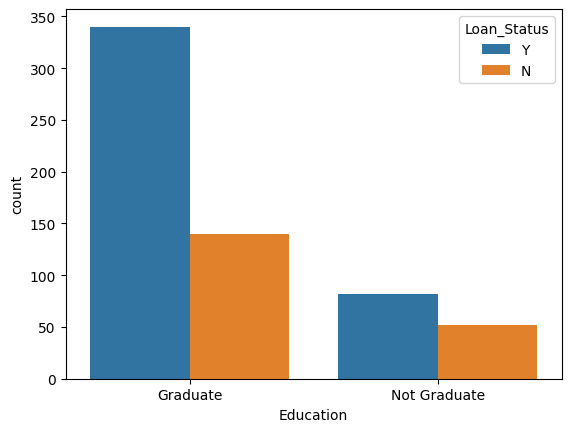

In [ ]:
# education & loan status
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

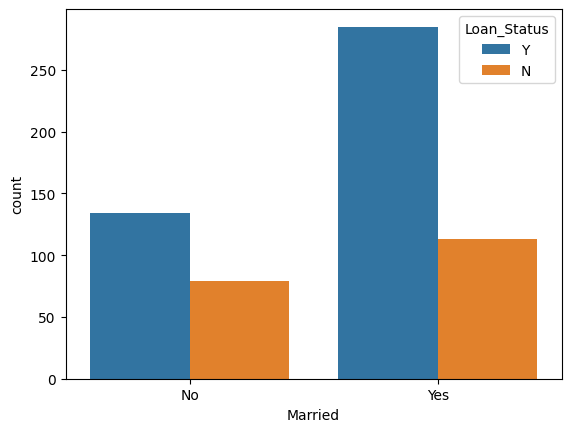

In [ ]:
# Married  & loan status
sns.countplot(x='Married', hue='Loan_Status', data=df)

<ipython-input-369-b216f0f3cd3e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Blues')


<Axes: >

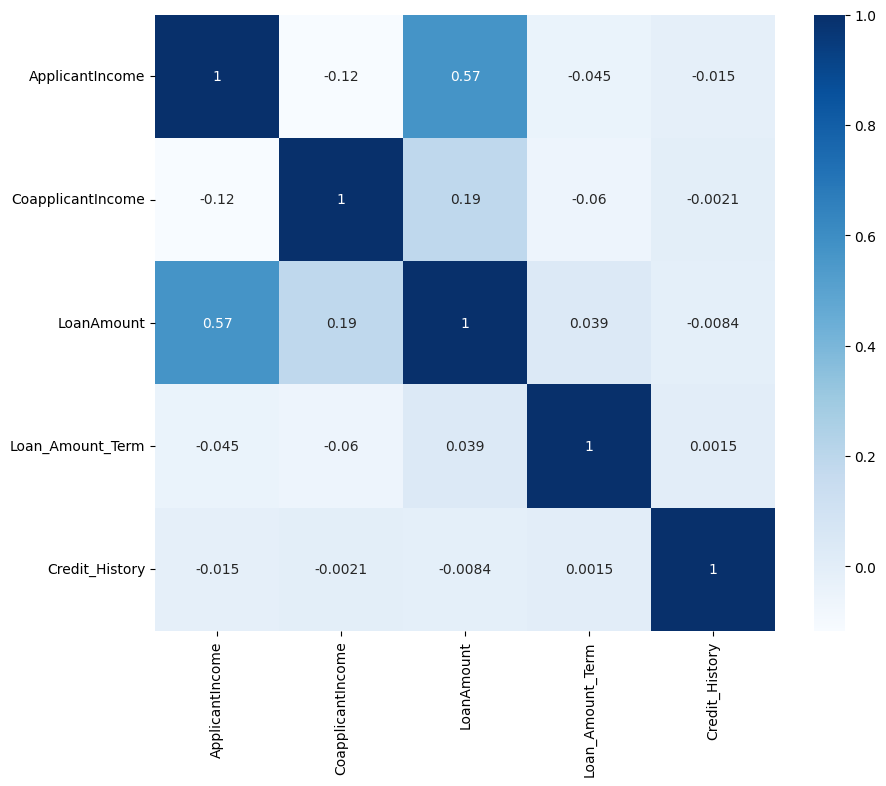

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

impute missing values

In [ ]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [ ]:
# change data type of numerical to float for KNN imputation
df[['ApplicantIncome']]= df[['ApplicantIncome']].astype(float)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame with categorical columns
columns_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Status']

le = LabelEncoder()

# Loop through each categorical column and encode it
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col]).astype(float)
    # df[col].astype(float)


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,NaN,360.0,1.0,2.0,1.0
1,LP001003,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,LP001005,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
3,LP001006,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
4,LP001008,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0


In [ ]:
df2 = df.drop(columns=['Loan_ID'])
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,NaN,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0


In [ ]:
'''
# Assuming 'df' is your DataFrame with categorical columns 'Category' and 'Type'
encoder = OneHotEncoder(sparse=False)  # Use sparse=False to get a dense array
encoded_data = encoder.fit_transform(df[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']])
encoded_data
'''

"\n# Assuming 'df' is your DataFrame with categorical columns 'Category' and 'Type'\nencoder = OneHotEncoder(sparse=False)  # Use sparse=False to get a dense array\nencoded_data = encoder.fit_transform(df[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']])\nencoded_data\n"

In [ ]:
imputer = KNNImputer(n_neighbors=3)
imputed_array = imputer.fit_transform(df2)
imputed_df = pd.DataFrame(imputed_array, columns= ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term',	'Credit_History','Property_Area','Loan_Status'])
imputed_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,138.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583.0,0.0,187.0,360.0,1.0,2.0,1.0


In [ ]:
# imputed_df['Loan_Status']= df['Loan_Status']
# imputed_df.head()

In [ ]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(12)
memory usage: 57.7 KB


<Axes: >

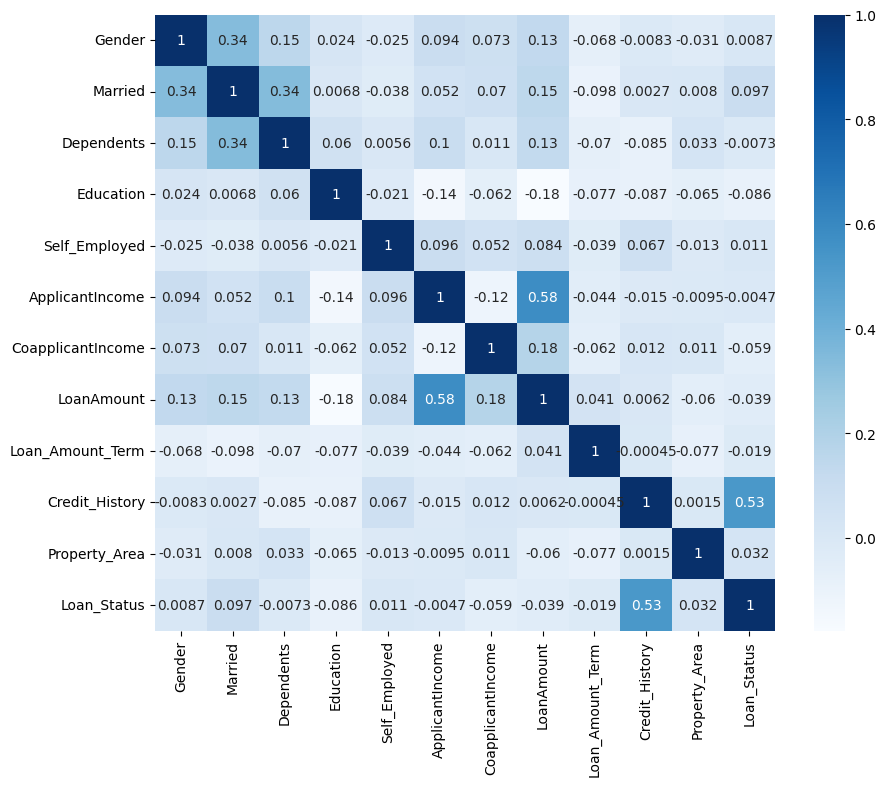

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(imputed_df.corr(),annot=True,cmap='Blues')

Training model using Label Encoding

In [ ]:
imputed_X= imputed_df.drop(columns='Loan_Status')

In [ ]:
imputed_Y = imputed_df['Loan_Status']

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(imputed_X,imputed_Y,test_size=0.2,random_state=42)

In [ ]:
model = SVC(kernel='linear')

In [ ]:
# model.fit(X_train,Y_train)

In [ ]:
# Y_pred= model.predict(X_test)

In [ ]:
# print('accuracy: ',accuracy_score(Y_test,Y_pred))
# print('precision: ',precision_score(Y_test,Y_pred))
# print('recall: ',recall_score(Y_test,Y_pred))

In [ ]:
model2 = LogisticRegression()
model2.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Y_pred2= model2.predict(X_test)

In [ ]:
print('accuracy: ',accuracy_score(Y_test,Y_pred2))
print('precision: ',precision_score(Y_test,Y_pred2))
print('recall: ',recall_score(Y_test,Y_pred2))

accuracy:  0.7886178861788617
precision:  0.7596153846153846
recall:  0.9875


Training model using One Hot Encoding

In [ ]:
imputed_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,138.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0


In [ ]:
ohe = OneHotEncoder()

column_transf = make_column_transformer((OneHotEncoder(),['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']),remainder='passthrough')

In [ ]:
pipe = make_pipeline(column_transf,model2)

In [ ]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area'])])),
                ('logisticregression', LogisticRegression())])

In [ ]:
Ypred3= pipe.predict(X_test)

In [ ]:
print('accuracy: ',accuracy_score(Y_test,Ypred3))
print('precision: ',precision_score(Y_test,Ypred3))
print('recall: ',recall_score(Y_test,Ypred3))

accuracy:  0.7804878048780488
precision:  0.7572815533980582
recall:  0.975
